In [1]:
import sys
import numpy as np
import os
sys.path.append(os.path.expanduser("~/git/machine_learning/src"))
import importlib
import models
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

2023-09-01 22:22:08.434139: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-01 22:22:08.470823: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_dir = os.path.expanduser("~m2d/git/analysis_playground/ml/data/training_data")

pars = np.load(os.path.join(data_dir, "orhs4-pars_pars.npy"))
refl = np.load(os.path.join(data_dir, "orhs4-pars_data.npy"))
q_values = np.load(os.path.join(data_dir, "orhs4_q_values.npy"))

print(pars.shape)
print(refl.shape)
print(q_values.shape)

idx = 0
nset=10000

(4000000, 13)
(4000000, 100)
(100,)


In [3]:


testset= np.asarray(refl[-nset:])
testsetout= np.asarray(pars[-nset:])
testpars = np.asarray (pars[-nset:])


In [12]:
import importlib
importlib.reload(models)
n_data = refl.shape[0]
n_features = refl.shape[1]
n_outputs = 13

encoder=models.cnn_encoder_test(n_data, n_features, n_outputs)
encoder.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam())
history = encoder.fit(refl, pars,
                        epochs=20, batch_size=2056,
                        validation_data=(testset, testsetout))
data_dir = os.path.expanduser("~/git/machine_learning/data")
models.save_model(encoder, "cnn4layer", data_dir)

Epoch 1/20
1946/1946 [==============================] - 22s 11ms/step - loss: 0.2649 - val_loss: 0.2532
Epoch 2/20
1946/1946 [==============================] - 23s 12ms/step - loss: 0.2484 - val_loss: 0.2463
Epoch 3/20
1946/1946 [==============================] - 22s 11ms/step - loss: 0.2431 - val_loss: 0.2418
Epoch 4/20
1946/1946 [==============================] - 22s 11ms/step - loss: 0.2394 - val_loss: 0.2401
Epoch 5/20
1946/1946 [==============================] - 22s 11ms/step - loss: 0.2366 - val_loss: 0.2368
Epoch 6/20
1946/1946 [==============================] - 22s 11ms/step - loss: 0.2344 - val_loss: 0.2361
Epoch 7/20
1946/1946 [==============================] - 22s 11ms/step - loss: 0.2326 - val_loss: 0.2334
Epoch 8/20
1946/1946 [==============================] - 22s 11ms/step - loss: 0.2311 - val_loss: 0.2319
Epoch 9/20
1946/1946 [==============================] - 21s 11ms/step - loss: 0.2299 - val_loss: 0.2310
Epoch 10/20
1946/1946 [==============================] - 23s 12m

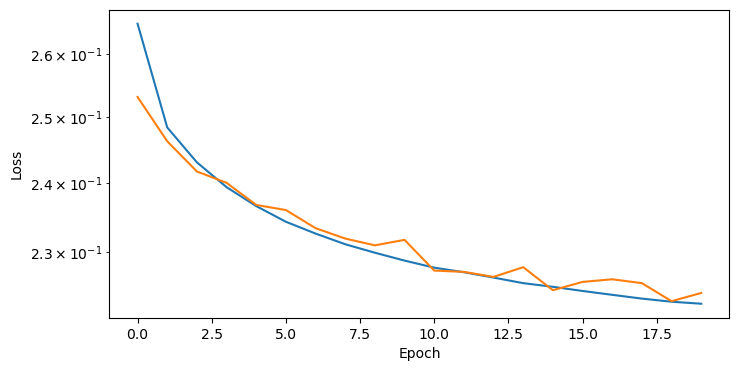

In [13]:
fig = plt.figure(dpi=100, figsize=[8,4])

plt.plot(np.arange(len(history.history['loss'])), history.history['loss'], label='loss')
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.xscale('linear')
plt.show()

In [14]:
importlib.reload(models)

<module 'models' from '/SNS/users/imeliamb/git/machine_learning/src/models.py'>

In [16]:
model=models.load_model("cnn4layer", data_dir)
idx=0

In [17]:
pars=encoder.predict(testset)


313/313 [==============================] - 1s 1ms/step


In [18]:
idx=0

In [19]:
print (pars[idx])
print(testsetout[idx])
idx+=1

[-0.19713938  0.18749411  0.3749806   0.29130498  0.18572961  0.1600098
  0.3814644  -0.05592412  0.18102974  0.2732285  -0.4583111   0.09273193
 -0.04754485]
[-0.19343611  0.39099762 -0.52216732  0.4671322   0.39936662  0.16961732
  0.67914382  0.30565303  0.03687358  0.87929167 -0.20621182  0.52394322
 -0.03587355]


(10000, 7)


Text(0.5, 0, 'a for index 1')

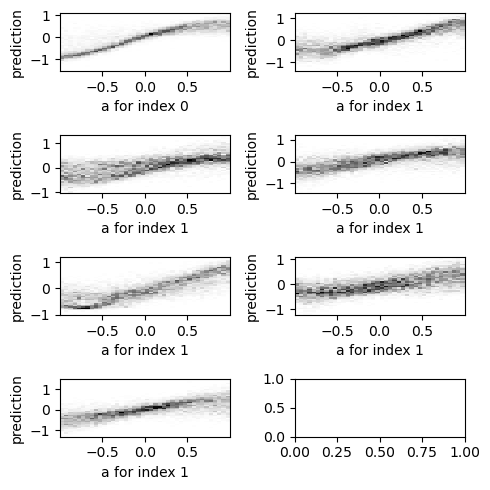

In [18]:
n_bins=40
print(pars.shape)
fig, axs= plt.subplots(4,2, sharey=False, tight_layout= True, dpi=100, figsize= (5,5))

ax=plt.subplot(4, 2, 1)
ax.hist2d(testsetout[:,0], pars[:,0], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 0')

ax=plt.subplot(4, 2, 2)
ax.hist2d(testsetout[:,1], pars[:,1], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')

ax=plt.subplot(4, 2, 3)
ax.hist2d(testsetout[:,2], pars[:,2], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')


ax=plt.subplot(4, 2, 4)
ax.hist2d(testsetout[:,3], pars[:,3], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')


ax=plt.subplot(4, 2, 5)
ax.hist2d(testsetout[:,4], pars[:,4], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')


ax=plt.subplot(4, 2, 6)
ax.hist2d(testsetout[:,5], pars[:,5], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')


ax=plt.subplot(4, 2, 7)
ax.hist2d(testsetout[:,6], pars[:,6], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')

